## Checking the hydrological model

We found a high simulated peak and we dont understand where this peak comes from. The hydrological model output is stored in monthly resolution and does not contain all variables and states (to be able to handle storage). We therefore have re-simulated the model for the largest simulated event, so we could store and analyse multiple variables and states on a daily resolution. Note that the simulations are exactly the same, the only difference is the way the output is stored.   

## Import

In [1]:
##Load pacakages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import os
import matplotlib.ticker as mticker

In [2]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

We load the catchment masks

In [3]:
##Load the catchment masks
masks=xr.open_dataset(r'/home/tike//EXPLORE/subCatchmentsAmazon.nc')
# masks_Ec=xr.open_dataset(dirname+'../EXPLORE/subCatchmentsAmazon_Ec.nc')


And we check which files are available for the re-simulated data

In [4]:
###Check which files are available for the re-simulated data
dirname = r'/home/tike/s13r13/netcdf/'
for filename in os.listdir(dirname):
    print (filename)

satDegLow_dailyTot_output.nc
directRunoff_dailyTot_output.nc
storGroundwater_dailyTot_output.nc
discharge_dailyTot_output.nc
totalWaterStorageThickness_dailyTot_output.nc
storLowTotal_dailyTot_output.nc
surfaceWaterStorage_dailyTot_output.nc
totalRunoff_dailyTot_output.nc
interflowTotal_dailyTot_output.nc
satDegUpp_dailyTot_output.nc
gwRecharge_dailyTot_output.nc
baseflow_dailyTot_output.nc
pr_d_ECEarth_PD_s13r13_2037.nc
storUppTotal_dailyTot_output.nc
waterBodyStorage_dailyTot_output.nc
totalEvaporation_dailyTot_output.nc
runoff_dailyTot_output.nc


We then load the relevant variables and states:

In [5]:
Discharge = xr.open_dataset(dirname + 'discharge_dailyTot_output.nc') #Streamflow
Discharge # m3/s

Runoff = xr.open_dataset(dirname + 'runoff_dailyTot_output.nc') 
Runoff #m/d

Direct_runoff = xr.open_dataset(dirname + 'directRunoff_dailyTot_output.nc') 
Direct_runoff #m/d

Baseflow = xr.open_dataset(dirname + 'baseflow_dailyTot_output.nc') 
Baseflow #m/d

Groundwater_recharge = xr.open_dataset(dirname + 'gwRecharge_dailyTot_output.nc') 
Groundwater_recharge #m/d


Groundwater_storage = xr.open_dataset(dirname + 'storGroundwater_dailyTot_output.nc') 
Groundwater_storage  #m -> it says daily?

Storage = xr.open_dataset(dirname + 'totalWaterStorageThickness_dailyTot_output.nc') 
Storage #m 

### Variables not used
# totalRunoff_dailyTot_output.nc
# satDegLow_dailyTot_output.nc
# storLowTotal_dailyTot_output.nc
# surfaceWaterStorage_dailyTot_output.nc
# interflowTotal_dailyTot_output.nc
# satDegUpp_dailyTot_output.nc
# storUppTotal_dailyTot_output.nc
# waterBodyStorage_dailyTot_output.nc
# totalEvaporation_dailyTot_output.nc


<xarray.Dataset>
Dimensions:    (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time       (time) datetime64[ns] 2035-01-01 2035-01-02 ... 2039-12-31
  * lat        (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
Data variables:
    discharge  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

<xarray.Dataset>
Dimensions:              (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time                 (time) datetime64[ns] 2035-01-01 ... 2039-12-31
  * lat                  (lat) float32 89.75 89.25 88.75 ... -89.25 -89.75
  * lon                  (lon) float32 -179.75 -179.25 -178.75 ... 179.25 179.75
Data variables:
    land_surface_runoff  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

<xarray.Dataset>
Dimensions:        (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time           (time) datetime64[ns] 2035-01-01 2035-01-02 ... 2039-12-31
  * lat            (lat) float32 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon            (lon) float32 -179.75 -179.25 -178.75 ... 179.25 179.75
Data variables:
    direct_runoff  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

<xarray.Dataset>
Dimensions:   (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time      (time) datetime64[ns] 2035-01-01 2035-01-02 ... 2039-12-31
  * lat       (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon       (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
Data variables:
    baseflow  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

<xarray.Dataset>
Dimensions:               (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time                  (time) datetime64[ns] 2035-01-01 ... 2039-12-31
  * lat                   (lat) float32 89.75 89.25 88.75 ... -89.25 -89.75
  * lon                   (lon) float32 -179.75 -179.25 ... 179.25 179.75
Data variables:
    groundwater_recharge  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

<xarray.Dataset>
Dimensions:              (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time                 (time) datetime64[ns] 2035-01-01 ... 2039-12-31
  * lat                  (lat) float32 89.75 89.25 88.75 ... -89.25 -89.75
  * lon                  (lon) float32 -179.75 -179.25 -178.75 ... 179.25 179.75
Data variables:
    groundwater_storage  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

<xarray.Dataset>
Dimensions:                           (lat: 360, lon: 720, time: 1826)
Coordinates:
  * time                              (time) datetime64[ns] 2035-01-01 ... 2039-12-31
  * lat                               (lat) float32 89.75 89.25 ... -89.75
  * lon                               (lon) float32 -179.75 -179.25 ... 179.75
Data variables:
    total_thickness_of_water_storage  (time, lat, lon) float32 ...
Attributes:
    description:  Niko Wanders (n.wanders@uu.nl, nwanders@princeton.edu)
    institution:  Utrecht University, Princeton University
    title:        PCR-GLOBWB model output

In addition, we load the precipitation and bias corrected precipitation data

In [6]:
##Load precipitation data for the flood
Start_flood1,Year_flood1,Ensemble_flood1, variable = [13,2037,13,'pr']
Precipitation = xr.open_dataset(r'/home/tike/Ec_data/' + variable + '/S' + '%02d' % Start_flood1 + '/' + variable + '_m_ECEarth_PD_s' + '%02d' % Start_flood1 + 'r'  + '%02d' % Ensemble_flood1 + '_' + '%04d' %Year_flood1 + '.nc')
Precipitation = Precipitation['pr'].sel(time='2037-07-16')/31 ##m/d
Precipitation.attrs={'long_name': 'EC-Earth precipitation',
 'units': 'm/d',
 'grid_type': 'gaussian',
 'short_name': 'pr'}
Precipitation
## Bias corrected precipitation
Precip_biascor = xr.open_dataset(dirname + 'pr_d_ECEarth_PD_s13r13_2037.nc') #Streamflow
Precipitation_biascor = Precip_biascor['pr'].sel(time=slice('2037-07-01','2037-08-01')).mean('time')
Precipitation_biascor.attrs={'long_name': 'Bias corrected precipitation',
 'units': 'm/d',
 'short_name': 'pr'}
Precipitation_biascor

<xarray.DataArray 'pr' (time: 1, lat: 160, lon: 320)>
array([[[0.00148596, 0.00149129, 0.00149661, ..., 0.00146513,
         0.00147207, 0.00147902],
        [0.00126342, 0.00126648, 0.00126954, ..., 0.00122361,
         0.00123688, 0.00125015],
        [0.00116569, 0.00118065, 0.00119562, ..., 0.00110212,
         0.00112331, 0.0011445 ],
        ...,
        [0.00015527, 0.00015763, 0.00016   , ..., 0.00015064,
         0.00015218, 0.00015373],
        [0.00016086, 0.00016127, 0.00016167, ..., 0.00015947,
         0.00015993, 0.00016039],
        [0.00015961, 0.00015946, 0.00015931, ..., 0.00015885,
         0.0001591 , 0.00015936]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 89.14 88.03 86.91 85.79 ... -86.91 -88.03 -89.14
  * time     (time) datetime64[ns] 2037-07-16T12:00:00
Attributes:
    long_name:   EC-Earth precipitation
    units:       m/d
    grid_type:   gaussian
    short_name:  pr

<xarray.DataArray 'pr' (lat: 360, lon: 720)>
array([[0.00111715, 0.00111715, 0.00111038, ..., 0.00111862, 0.00111991,
        0.00111991],
       [0.00108417, 0.00107514, 0.0010679 , ..., 0.00108463, 0.00108655,
        0.00108733],
       [0.0010632 , 0.00105866, 0.00105412, ..., 0.00107279, 0.00107091,
        0.00106958],
       ...,
       [0.00063694, 0.0006386 , 0.00064018, ..., 0.00063148, 0.00063315,
        0.00063511],
       [0.00066979, 0.00066769, 0.0006662 , ..., 0.00066196, 0.00066592,
        0.00066873],
       [0.00069784, 0.00069784, 0.00069871, ..., 0.00069583, 0.00069688,
        0.00069688]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
Attributes:
    long_name:   Bias corrected precipitation
    units:       m/d
    short_name:  pr

We load the masks and pre-process the discharge and runoff variables

In [7]:
mask_Amazon = (masks['Amazon']==1).squeeze('time')# USE squeeze!! instead of drop
mask_Xingu = (masks['Xingu']==1).squeeze('time')# USE squeeze!!
mask_Tapajos = (masks['Tapajos']==1).squeeze('time')# USE squeeze!!

In [8]:
discharge = Discharge['discharge'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean('time')
discharge.attrs={'long_name': 'Discharge',
 'units': 'm3/s'}

runoff = Direct_runoff['direct_runoff'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean('time')
runoff.attrs={'long_name': 'Direct runoff',
 'units': 'm/d'}

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


And then we plot!

Text(0.5, 1.0, 'Discharge')

Text(0.5, 1.0, 'Runoff')

Text(0.5, 1.0, 'Raw Precipitation')

Text(0.5, 1.0, 'Corrected Precipitation')

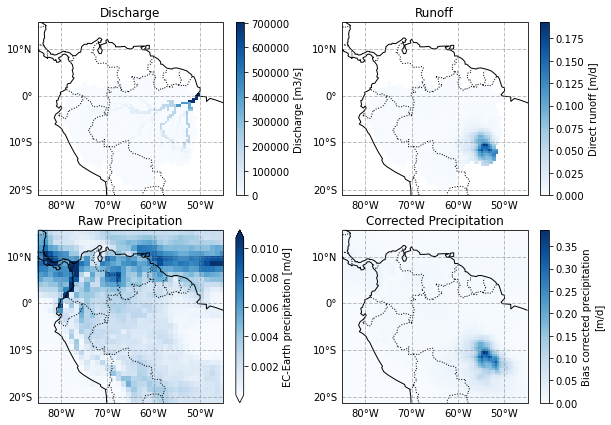

In [17]:
fig, axs = plt.subplots(2, 2,figsize=(10,7),subplot_kw={'projection': ccrs.Mercator()})

discharge.plot.pcolormesh(ax=axs[0, 0],transform=ccrs.PlateCarree(),cmap=plt.cm.Blues)
runoff.plot.pcolormesh(ax=axs[0, 1],transform=ccrs.PlateCarree(),cmap=plt.cm.Blues)
Precipitation.plot(ax=axs[1, 0], robust = True, transform=ccrs.PlateCarree(),cmap=plt.cm.Blues)
Precipitation_biascor.plot.pcolormesh(ax=axs[1, 1],  transform=ccrs.PlateCarree(),cmap=plt.cm.Blues)


titles = ['Discharge', 'Runoff', 'Raw Precipitation', 'Corrected Precipitation']

for i, ax in enumerate(axs.flat):
    ax.set_title(titles[i])
    ax.set_extent([-85, -45, 15, -20])
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=1,
        color='gray',
        alpha=0.5,
        linestyle='--')
    gl.xlabels_top  = False
#     if i not in [0,3,6,9]:
#         gl.ylabels_left = False
#     if i not in [9,10,11]:
#         gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(-20,30,10))
    gl.xlocator = mticker.FixedLocator(np.arange(-90,-30,10))

    
# Runoff.where((masks['Amazon']==1).drop('time')).plot(ax=axs[1, 0],transform=ccrs.PlateCarree(),cmap=plt.cm.Blues)
plt.savefig('../Graphs/paper/Flood_source.png', dpi=300)

We also plot the fluxes and states averaged over the Amazon basin

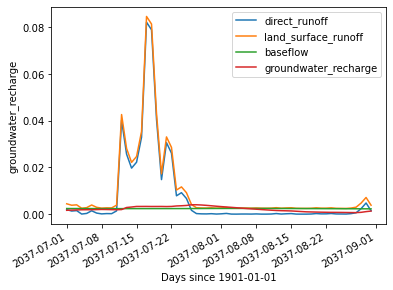

In [99]:
Direct_runoff['direct_runoff'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean(['lat','lon']).plot(label='direct_runoff')
Runoff['land_surface_runoff'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean(['lat','lon']).plot(label='land_surface_runoff')
Baseflow['baseflow'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean(['lat','lon']).plot(label='baseflow')
Groundwater_recharge['groundwater_recharge'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean(['lat','lon']).plot(label='groundwater_recharge')

plt.legend()
plt.show()
plt.savefig('../Graphs/paper/Flood_source_fluxes.svg', dpi=300)

Groundwater_storage['groundwater_storage'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean(['lat','lon']).plot(label='groundwater_storage')
Storage['total_thickness_of_water_storage'].sel(time=slice('2037-07','2037-08')).where(mask_Amazon).mean(['lat','lon']).plot(label='total_thickness_of_water_storage')
plt.legend()
plt.savefig('../Graphs/paper/Flood_source_storage.svg', dpi=300)
